# TITANIC ANALYSIS CA1 REPORT PART A CLASSIFICATION

# Importing the relevant libraries for analysis, cleaning and visualisation



In [1]:
#data cleaning and manipulation
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Scikit learn 
# Encode all non numeric column
from sklearn.preprocessing import LabelEncoder


# Load the train data

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Load the test data

In [3]:
test_df = pd.read_csv('data/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# identify data shape, columns name, types and data details for train dataset
## the columns can be identified by the types, the relevant shapes of data set (891,12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# identify data shape, columns name, types and data details for test dataset
## the columns can be identified by the types, the relevant shapes of data set (418,11)

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# DATA CLEANING AND CLEANING OF MISSING DATA

## TRAIN DATASET MISSING
### for the train dataset, there's quite a substantial number of missing data in Age and Cabin, with only 2 entries missing for Embarked

In [6]:
# Count for missing values for train data
missing_no_train = train_df.isnull()
countmissing_train = missing_no_train.sum()
countmissing_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## TRAIN DATASET CLEANING
### for the training dataset, have decided to replace all the age with the mean age and for the embarked, since there is only 2 entries we have dropped it, as for cabin, since it is a subtantial amount of data we have leave it and to exclude from our analysis as a feature

In [7]:

#replace missing data with mean for training data set for age
train_df['Age'].fillna(int(test_df['Age'].mean()), inplace=True) 
#drop missing data with mean for training data set for Fare
train_df.dropna(subset=['Embarked'], inplace=True)

# Count for missing values for train data
missing_no_train = train_df.isnull()
countmissing_train = missing_no_train.sum()
countmissing_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## TEST DATASET MISSING
### for the test dataset, 

In [8]:
# Count for missing values for train data
missing_no_test = test_df.isnull()
countmissing_test = missing_no_test.sum()
countmissing_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## TEST DATASET CLEANING
### Fill up fares with mean, as test data set is for submission and requirements is for 418 rows, we want to retain the rows instead of dropping it

In [9]:
test_df['Fare'].fillna(int(test_df['Fare'].mean()), inplace=True)
test_df['Age'].fillna(int(test_df['Age'].mean()), inplace=True) 
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S


# ANALYSIS AND DATA EXPLORATION

## Survival rates vs gender
### Percentage overview of females vs male survivor rates

#### From results below it can be inferred that there is a higher chance of females surviving the titanic disaster

In [10]:
females_survived = (train_df['Sex'].str.contains('female')) & (train_df['Survived'] ==1)
males_survived = (train_df['Sex'].str.contains('male')) & (train_df['Survived'] ==1)

count_females_survived=train_df[females_survived].shape[0]
count_males_survived=train_df[males_survived].shape[0]

count_row_females = len(train_df[train_df['Sex']=="female"])
count_row_males = len(train_df[train_df['Sex']=="male"])

percentage_females_survived = count_females_survived/count_row_females*100
percentage_males_survived = count_males_survived/count_row_males*100

print("the % of females who survived is",percentage_females_survived, "percent")
print("the % of males who survived is",percentage_males_survived, "percent")

the % of females who survived is 74.03846153846155 percent
the % of males who survived is 58.925476603119584 percent


## analysis of other variables for correlation to survivability
### start by encoding categorical features to numerical for further analysis

In [11]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
train_df['Pclass'] = le.fit_transform(train_df['Pclass'])
train_df['Ticket'] = le.fit_transform(train_df['Ticket'])
train_df['Cabin'] = le.fit_transform(train_df['Cabin'])
train_df['Fare'] = le.fit_transform(train_df['Fare'])
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,522,18,146,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,207,80,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,668,41,146,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,189,54,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,471,43,146,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,100,85,146,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,153,29,2
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,674,131,146,2
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,8,153,59,0


## exploring other variables other than Age to find a patterns

### key findings from pairplot

-(pclass) to keep: For passenger class the upper class (1) seems to have higher survivability rates as compared to lower classes (3) - negative correlation (-0.34)

-(Fare)X: No special correlations and special patterns to drop

-(SibSp)Low number of sibilings or close to zero seem to have highest survivability rates

-(Parch)to keep: There is higher survivability for more parents/children maybe due to fact that they will prioritise evacuation for those that are females with kids.

-(Age)to keep: There seem to be higher survivability of younger passengers and older, indicating there is an effort to prioritise children and elderly in rescue efforts

-(embarked)to deep dive: seems like there's not much correlations to survivial rates, but there some patterns with lower survivability particular embarkation in Southampton

-X (Ticket) No special correlations and no special patterns from pair plot as well to drop

-X (Passenger ID) No special correlations and no special patterns from pair plot as well to drop
  
-X (Name) no special patterns

-(Cabin)- to deep dive: seems like there's not much correlations to survivial rates, but there seem to have some differences in Correlations

C:\Users\chew_\AppData\Local\Temp\ipykernel_15144\1560299757.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Parch','Embarked','Age','Ticket']].corr(), annot=True,cmap="crest")


<Axes: >

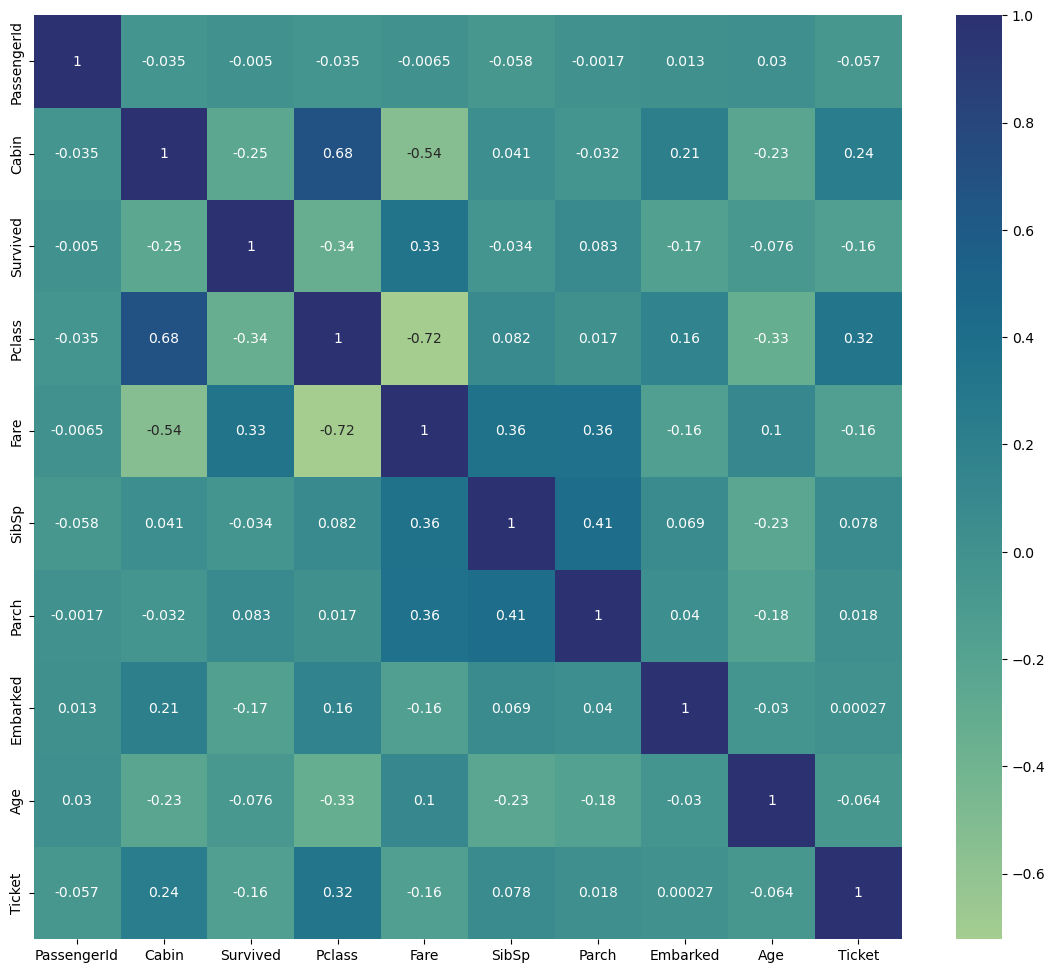

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(train_df[['PassengerId', 'Name','Cabin','Survived','Pclass','Fare','SibSp',
                      'Parch','Embarked','Age','Ticket']].corr(), annot=True,cmap="crest")

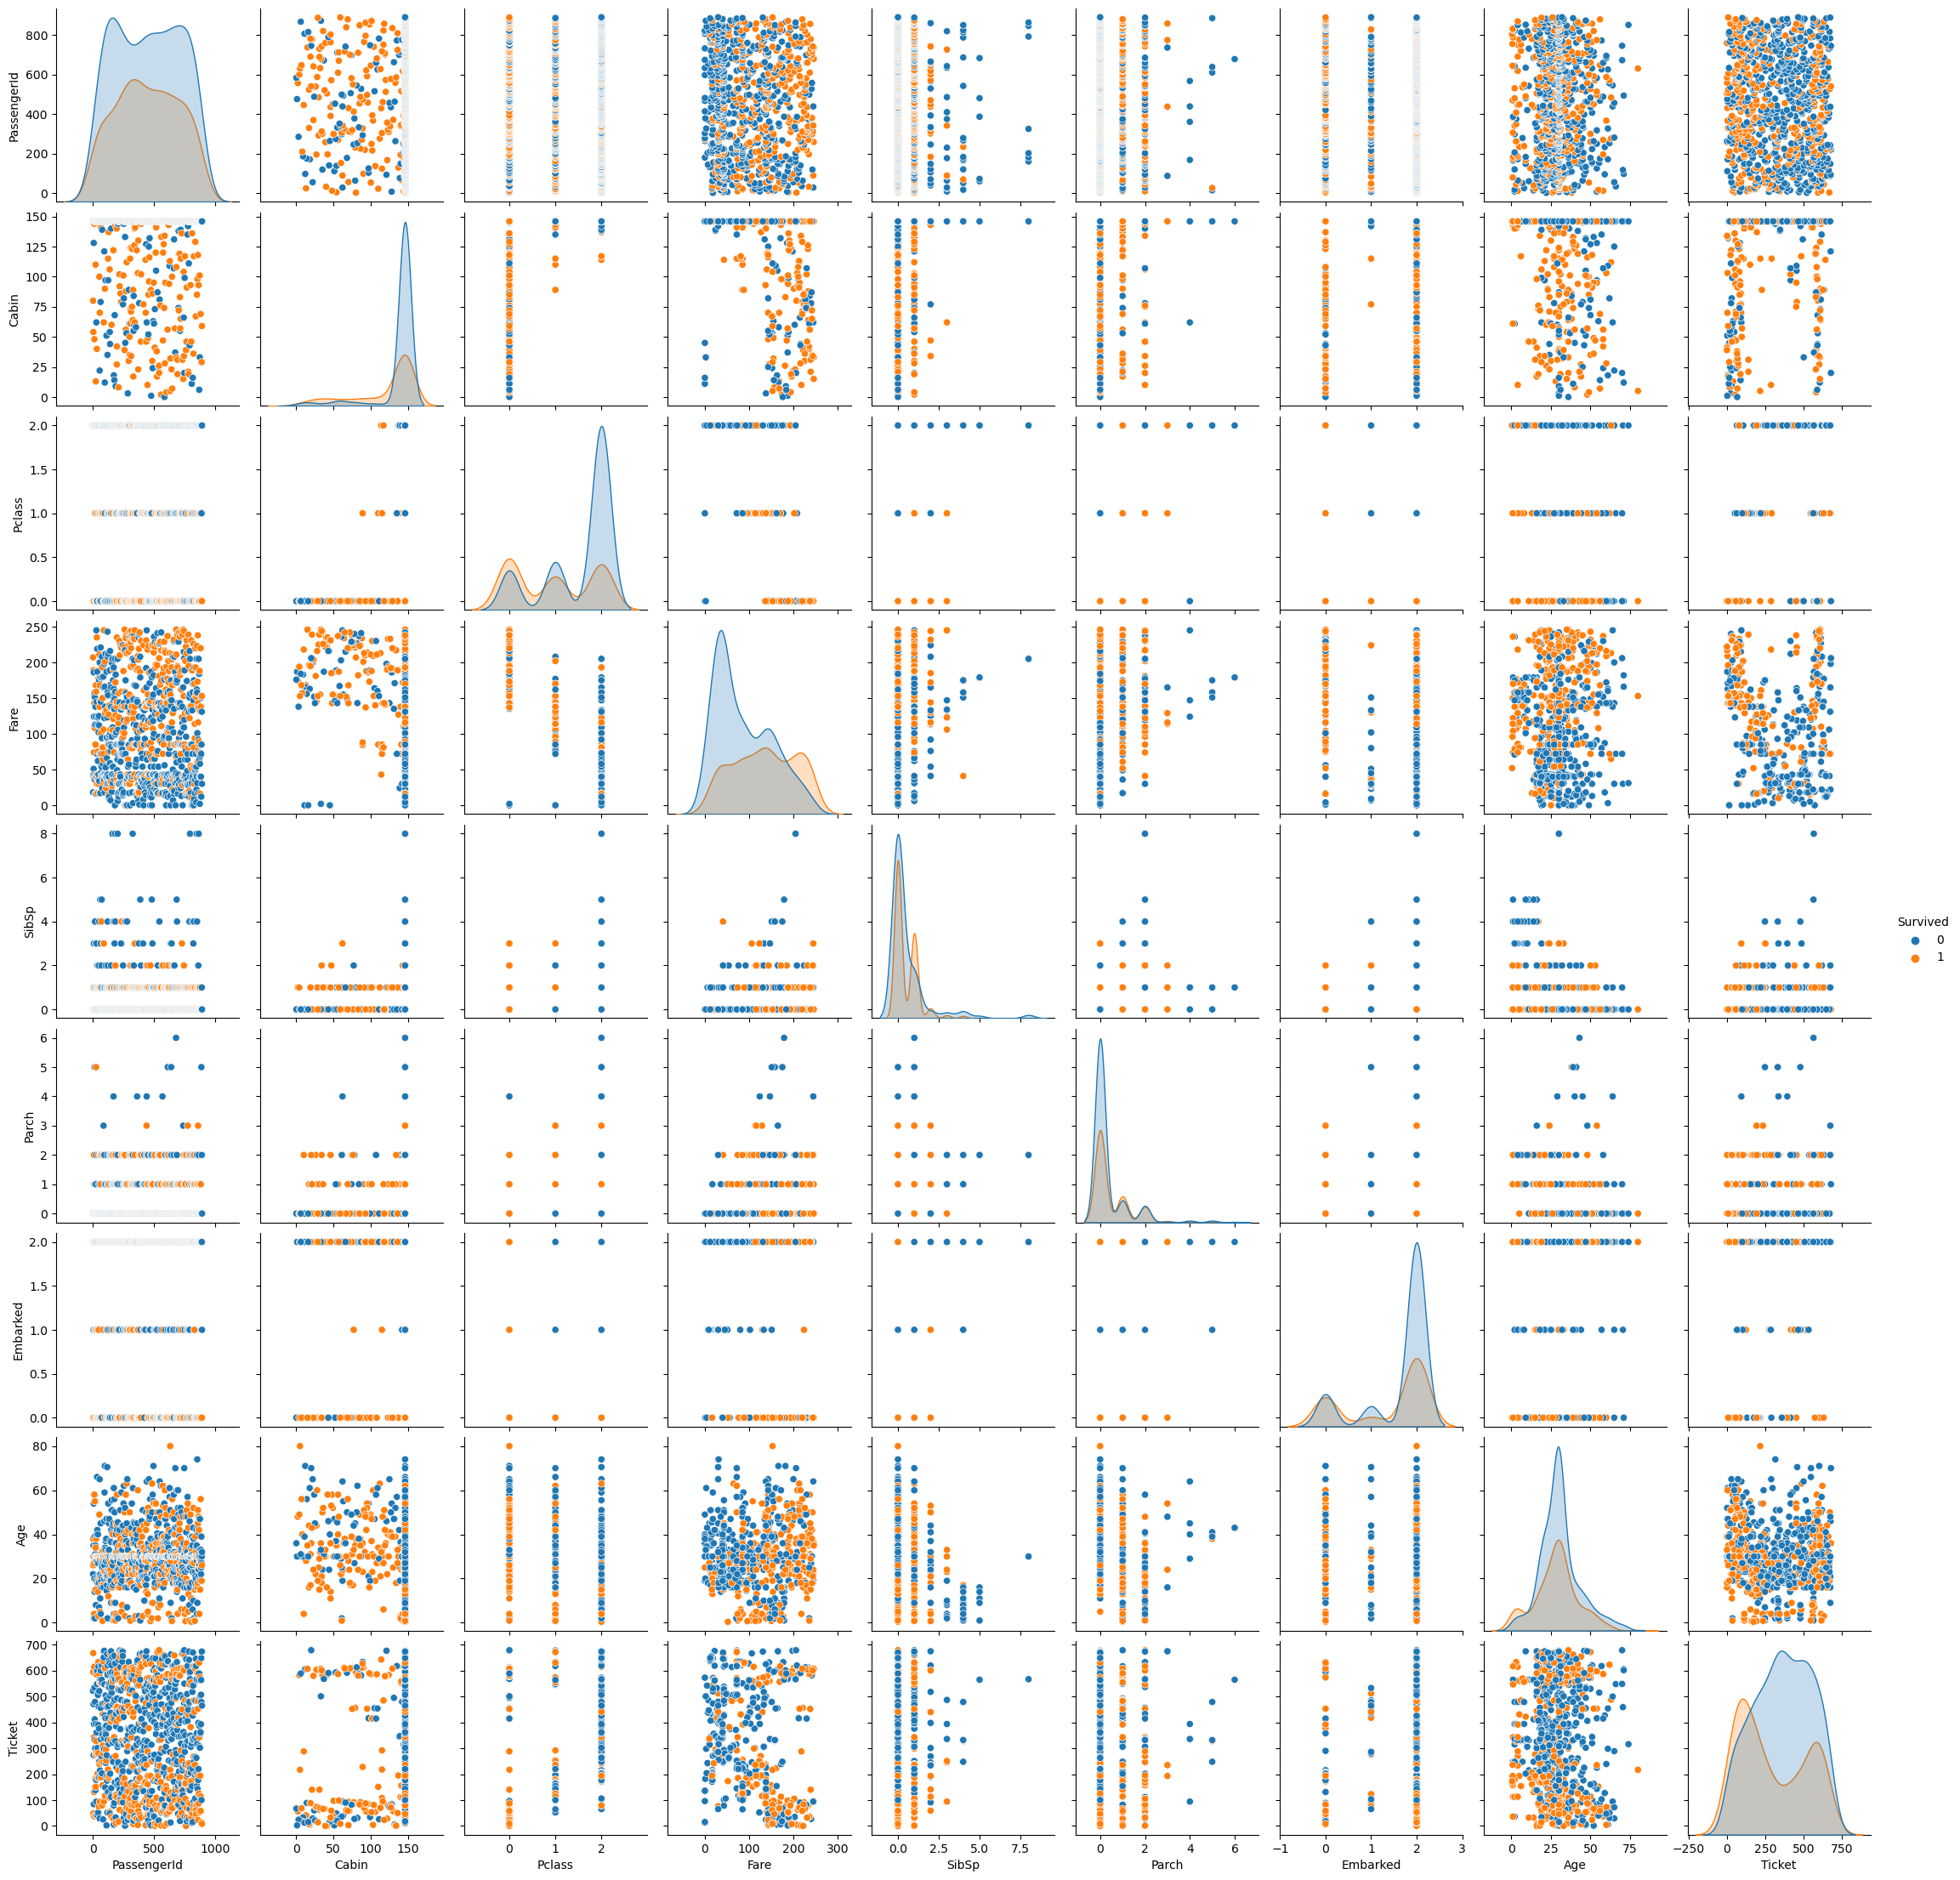

In [13]:
Other_variables_df = train_df[['PassengerId', 'Name','Cabin','Survived','Pclass','Fare','SibSp',
                      'Parch','Embarked','Age','Ticket']]
sns.pairplot(Other_variables_df, hue="Survived")

## Deep dive into Embarked, cabin and Correlations as there seem to be some patterns in Pairplot
### look into distribution for each of the individual variables

- X(embarked) higher survivability in one port due to more people embarking from one port, no correlations/pattern, to drop

- X (Ticket) No special correlations and no special patterns from pair plot as well to drop

- X (Passenger ID) No special correlations and no special patterns from pair plot as well to drop
  
-X (Name) no special patterns

- X (Cabin)- higher survivability in one cabin type due to more people from one cabin type, no correlations/pattern, to drop

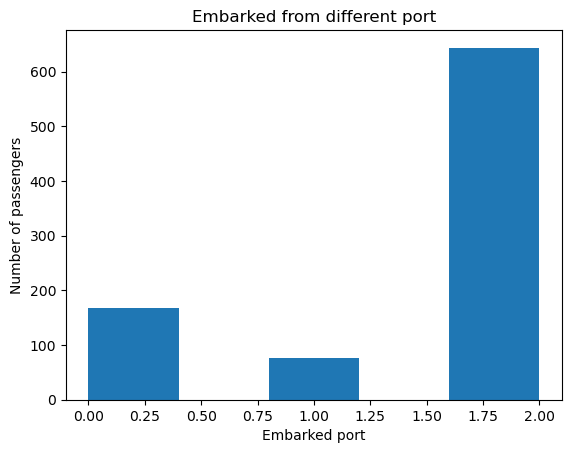

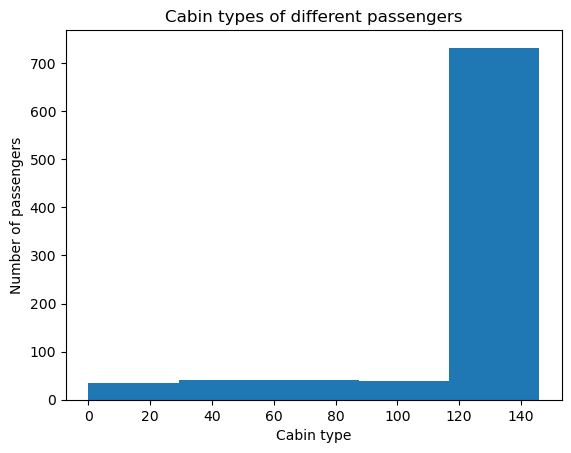

In [14]:

##Embarked port histogram
plt.title('Embarked from different port')
plt.xlabel("Embarked port")
plt.ylabel("Number of passengers")
plt.hist(train_df["Embarked"], bins=5)
plt.show()
      
##Cabin port histogram
plt.title('Cabin types of different passengers')
plt.xlabel("Cabin type")
plt.ylabel("Number of passengers")
plt.hist(train_df["Cabin"], bins=5)
plt.show()
      

# FEATURE SELECTION and ENGINEERING
## Dropping columns that are not necessary for building model

In [15]:
train_df = train_df.drop(columns=['PassengerId', 'Name','Cabin','Embarked','Ticket','Fare'])


# Modeling and Evaluation

In [16]:
## Splitting data by train and test

In [17]:
# splitting data 
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Classifying by Random Forest Classifier and hyperparameters

### Find the most accurate parameters

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

rf = RandomForestClassifier()
param_grid = {"n_estimators":[10,50,100,150,200],
            "max_depth":[None,10,20,30,50]}

# Train the classifier
rf.fit(X_train, y_train)

grid = GridSearchCV(rf, param_grid,
                      cv=10,n_jobs=-1, refit=True, verbose=True,scoring="accuracy")
grid.fit(X_train,y_train)

grid.best_params_


Fitting 10 folds for each of 25 candidates, totalling 250 fits


{'max_depth': 10, 'n_estimators': 50}

In [19]:
from sklearn.metrics import accuracy_score

rf_tuned =rf.set_params(**grid.best_params_).fit(X_train,y_train)
pred_y = rf_tuned.predict(X_test)
print(f"Accuracy: {accuracy_score(pred_y, y_test)*100:.4f}","%")

Accuracy: 78.0899 %


### Confusion matrix

In [20]:
from sklearn.metrics import classification_report
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 


{'max_depth': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       114
           1       0.72      0.73      0.73        64

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## Submitting to Kaggle

In [21]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S


In [22]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
p_id = test_df[['PassengerId']].values.reshape(-1,1)
submission_df= test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
submission_df['Sex'] = le.fit_transform(submission_df['Sex'])
submission_df

submission_pred = grid.predict(submission_df)
submission_df['PassengerId'] = p_id
submission_df['Survived'] = submission_pred
submission_df= submission_df[['PassengerId','Survived']]




C:\Users\chew_\AppData\Local\Temp\ipykernel_15144\3742275984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sex'] = le.fit_transform(submission_df['Sex'])
C:\Users\chew_\AppData\Local\Temp\ipykernel_15144\3742275984.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['PassengerId'] = p_id
C:\Users\chew_\AppData\Local\Temp\ipykernel_15144\3742275984.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

# Save file and submit

In [23]:
from pathlib import Path  
filepath = Path('submissions/submission_file.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
submission_df.to_csv(filepath, index=False) 